# Projeto 2 - Ciência dos Dados



**Grupo:** Daniel Parnes, Luca Oshiro Camargo e Tomás Selaibe Pires - Turma C

Carregando bibliotecas

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

Lendo a base de dados selecionada para o Projeto

In [4]:
filename = 'cardetails.xlsx'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com o desenvolvimento do projeto!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que ele foi baixado corretamente?')

Encontrei o arquivo cardetails.xlsx, tudo certo para prosseguir com o desenvolvimento do projeto!


In [5]:
database = pd.read_excel(filename)
database.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
database.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [7]:
database.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [8]:
database.isnull().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

In [9]:
database.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [10]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [11]:
database = database.dropna()
database.describe()

,year,selling_price,km_driven,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393
std,3.863695,8.135827e+05,5.679230e+04,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Comparando as descrições da base de dados antes e depois da remoção das linhas com valores vazios, percebemos que a diferença entre eles era proporcionalmente pequena. Vimos que o preço médio após a remoção dos valores vazios aumentou e a quilometragem rodada média diminuiu, indicando que os carros removidos eram de menor valor e mais rodados. Como o número de carros removidos representa em torno de 3% da base de dados e tendo os pontos mencionados acima em mente, podemos removê-los da base de dados.

**Limpando e substituindo dados**

Substituindo os valores da coluna owner:

In [12]:
database['owner'].value_counts()

First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64


First Owner $\Rightarrow 1$

Second Owner $\Rightarrow 2$

Third Owner $\Rightarrow 3$

Fourth & Above Owner $\Rightarrow 4$

Test Drive Car $\Rightarrow 5$

In [13]:
database['owner'] = database['owner'].astype('category')
database['owner'] = database['owner'].cat.reorder_categories(['First Owner', 'Second Owner',
       'Third Owner', 'Fourth & Above Owner','Test Drive Car'], ordered=True)
database['owner'].cat.categories = [1, 2, 3, 4, 5]

Substituindo os valores da coluna fuel:

In [14]:
database['fuel'].value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

Diesel $\Rightarrow 1$

Petrol $\Rightarrow 2$

CNG $\Rightarrow 3$

LPG $\Rightarrow 4$

In [15]:
database['fuel'] = database['fuel'].astype('category')
database['fuel'] = database['fuel'].cat.reorder_categories(['Diesel', 'Petrol',
       'CNG', 'LPG'], ordered=True)
database['fuel'].cat.categories = [1, 2, 3, 4]

Substituindo os valores da coluna transmission:

In [16]:
database['transmission'].value_counts()

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

Manual $\Rightarrow 1$

Automatic $\Rightarrow 2$

In [17]:
database['transmission'] = database['transmission'].astype('category')
database['transmission'] = database['transmission'].cat.reorder_categories(['Manual', 'Automatic'], ordered=True)
database['transmission'].cat.categories = [1, 2]

Substituindo os valores da coluna seller_type:

In [18]:
database['seller_type'].value_counts()

Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64

Individual $\Rightarrow 1$

Dealer $\Rightarrow 2$

Trustmark Dealer $\Rightarrow 3$

In [19]:
database['seller_type'] = database['seller_type'].astype('category')
database['seller_type'] = database['seller_type'].cat.reorder_categories(['Individual', 'Dealer','Trustmark Dealer'], ordered=True)
database['seller_type'].cat.categories = [1, 2, 3]

**Limpando a coluna mileage**

Nessa limpeza, retiramos a unidade dos valores das linhas, transformando-os em float e convertemos km/kg para kmpl usando a densidade média da gasolina.

In [20]:
mileage = []
for i in database['mileage']:
    alvos = ["kmpl", "km/kg"]
    kmkg = 1
    if "km/kg" in i:
        kmkg = 0.7475 #Conversor pela densidade média
    for unidade in alvos:
        i = i.replace(unidade, "")
        i = i.replace(" ","")
    i = float(i)*kmkg
    mileage.append(i)
database['mileage'] = pd.Series(mileage)
database.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,1,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,2,1,1,3,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,1,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,2,1,1,1,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


**Limpando a coluna engine**

Nessa limpeza, também retiramos a unidade dos valores das linhas, transformando-os em float.

In [21]:
engine = []
for i in database['engine']:
    i = i.replace('CC', "")
    i = i.replace(" ","")
    i = float(i)
    engine.append(i)
database['engine'] = pd.Series(engine)
database.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,1,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,2,1,1,3,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,1,23.00,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,2,1,1,1,16.10,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


**Limpando a coluna max_power**

Nessa limpeza, fizemos o mesmo procedimento das demais colunas.

In [22]:
max_power = []
for i in database['max_power']:
    i = i.replace('bhp', "")
    i = i.replace(" ","")
    i = float(i)
    max_power.append(i)
database['max_power'] = pd.Series(max_power)
database.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


**Limpando a coluna Torque**

Nessa limpeza, fizemos o mesmo procedimento das demais colunas.

In [23]:
torque = []
for i in database['torque']:
    fator = 1  #Conversor de Kgmf em Nm (x10 caso seja kgmf)
    if 'kg' in i and 'Nm' not in i:
        fator = 10  
    novoi = i[:3]
    alvo = ['@','N','n','m','K','k','g','(',')']
    for letra in alvo:
        novoi = novoi.replace(letra,"")
        novoi = novoi.replace(" ","")
    novoi = float(novoi)*fator
    torque.append(novoi)
database['torque'] = torque
database['torque'].head()

0    190.0
1    250.0
2    120.0
3    220.0
4    110.0
Name: torque, dtype: float64

**Criando uma coluna da idade do carro**

In [24]:
database['Car_Age'] = 2020 - database.year
database.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Car_Age
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,190.0,5.0,6
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,250.0,5.0,6
2,Honda City 2017-2020 EXi,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,120.0,5.0,14
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,220.0,5.0,10
4,Maruti Swift VXI BSIII,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,110.0,5.0,13


**Análise exploratória**

In [25]:
import seaborn as sns

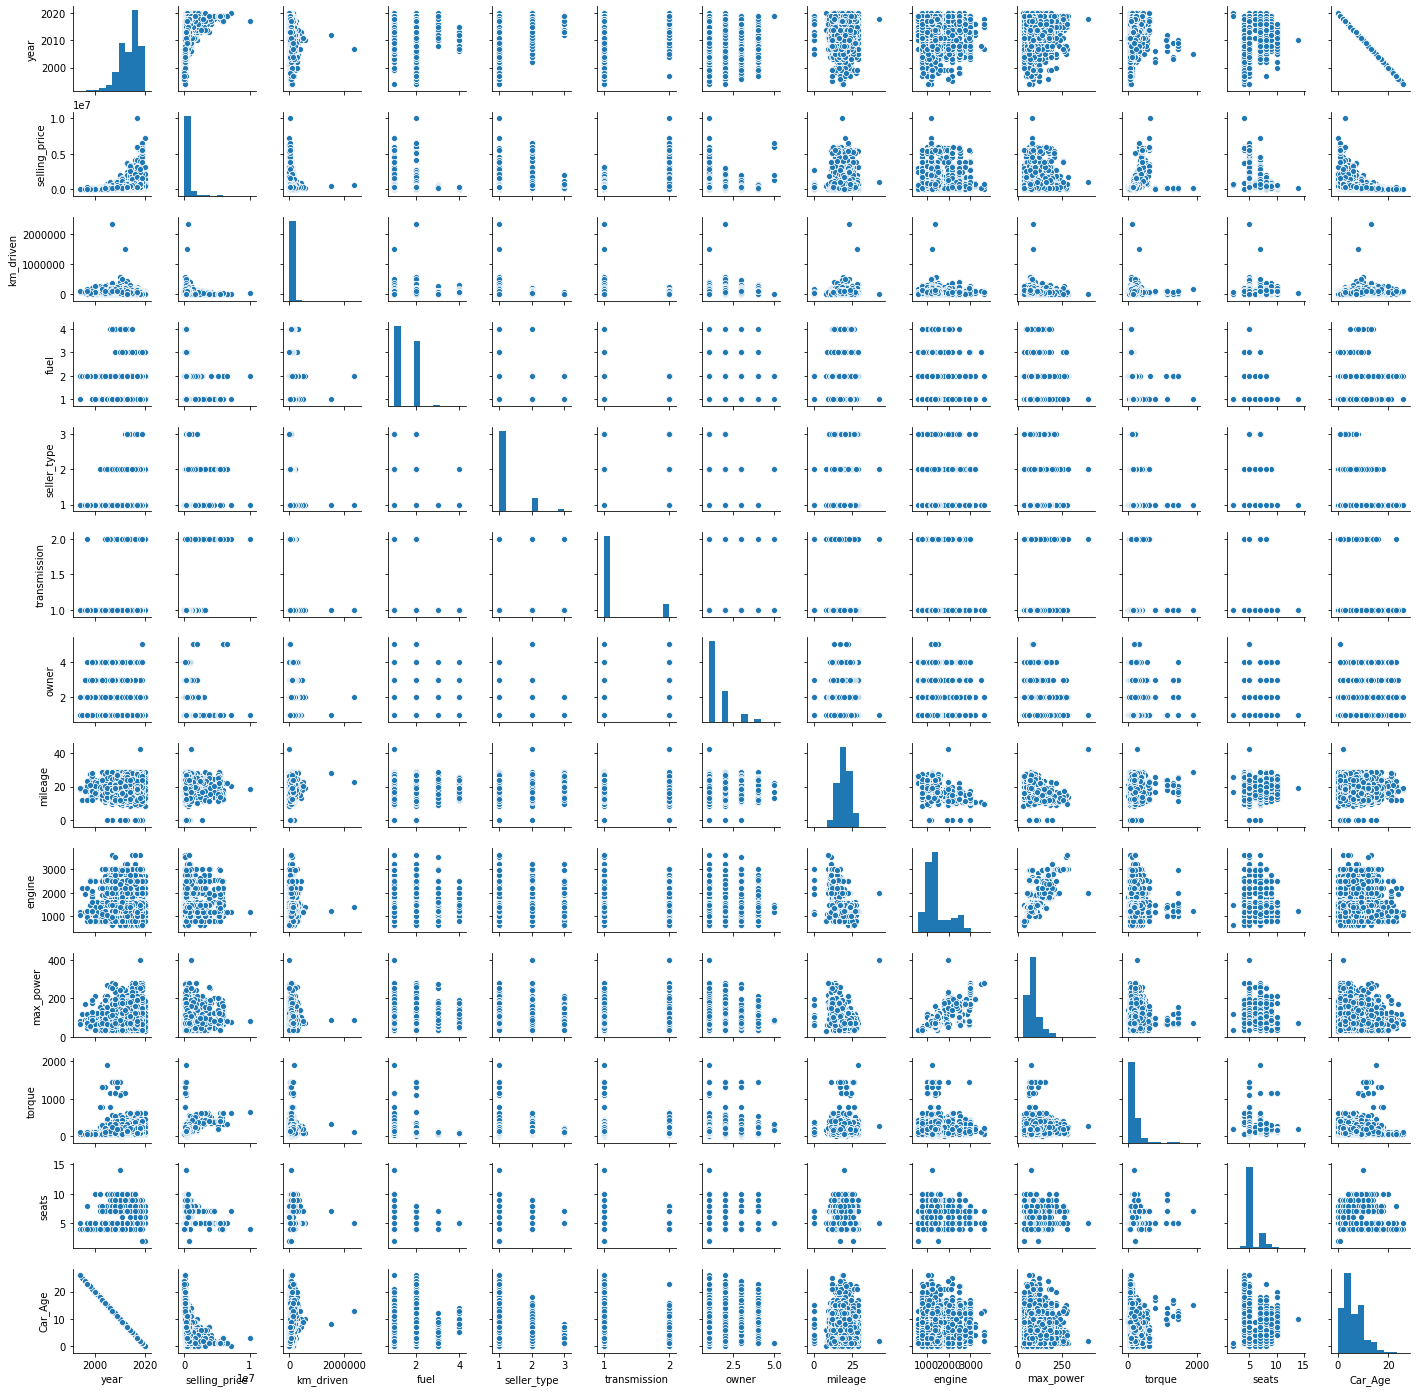

In [27]:
sns.pairplot(database,height=1.5)

In [32]:
database.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'Car_Age'],
      dtype='object')

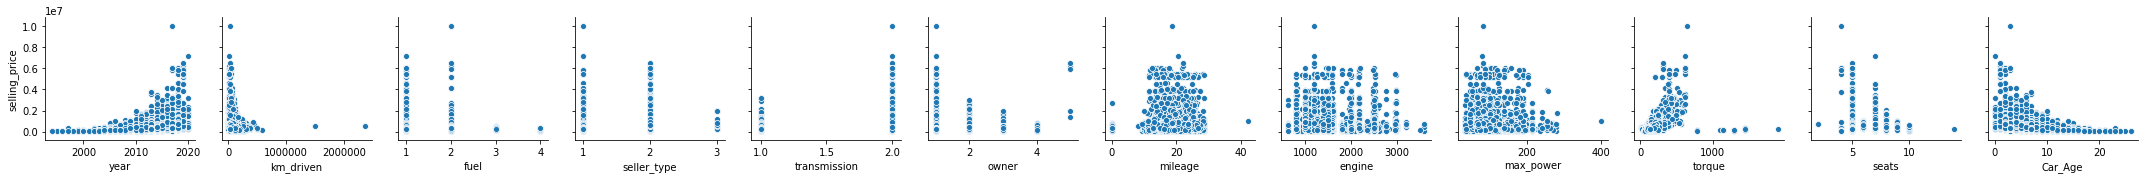

In [34]:
sns.pairplot(database, x_vars=['year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'Car_Age'], y_vars=['selling_price'])